<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/plot_digits_classification_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [101]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



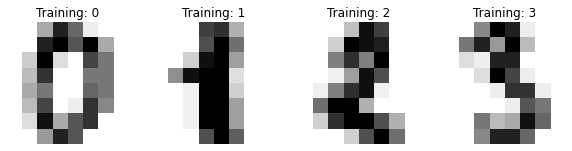

In [102]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [103]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



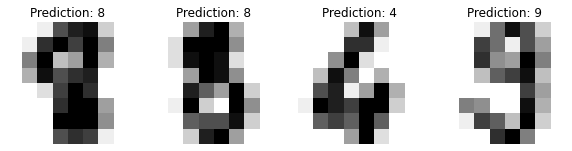

In [104]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [105]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


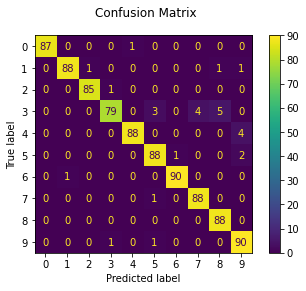

In [106]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# USING PCA FEATURES

In [134]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_components = 64
h=8
w=8

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("PCA projection of the images")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 64 eigenfaces from 898 faces
PCA projection of the images


In [135]:
X_train_pca.shape

(898, 64)

In [136]:
pca.explained_variance_ratio_.cumsum()

array([0.13980742, 0.27616399, 0.40031404, 0.49787873, 0.55746308,
       0.60477844, 0.65006607, 0.68698069, 0.71969881, 0.75113127,
       0.77579105, 0.79702043, 0.81637679, 0.83150982, 0.84611473,
       0.85979142, 0.87190668, 0.88241987, 0.89153861, 0.90049191,
       0.9090316 , 0.91701367, 0.92407354, 0.93056936, 0.93669175,
       0.94260684, 0.94768899, 0.95268646, 0.95738334, 0.96173392,
       0.96540631, 0.96889967, 0.97202622, 0.97501604, 0.97774639,
       0.98028887, 0.98263656, 0.98486706, 0.98694804, 0.98881417,
       0.99062601, 0.99220794, 0.99374121, 0.99507065, 0.9961857 ,
       0.99720187, 0.99810261, 0.99890077, 0.99936144, 0.99970995,
       0.99985214, 0.99993997, 0.99996938, 0.99998682, 0.99999452,
       0.99999688, 0.99999778, 0.99999867, 0.99999948, 0.9999999 ,
       1.        , 1.        , 1.        , 1.        ])

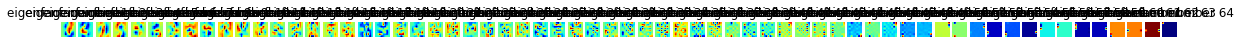

In [137]:
%matplotlib inline

fig, axes = plt.subplots(1,n_components,figsize=(20, 20))
ax = axes.ravel()
for i in range(n_components):
  ax[i].imshow(eigenfaces[i,:,:],cmap=plt.cm.jet)
  ax[i].set_title('eigenface number {}'.format(i+1)) 
  ax[i].set_axis_off()
plt.show()

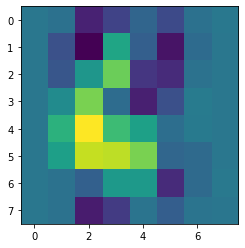

In [138]:
plt.imshow(eigenfaces[1,:,:])

In [139]:

print("Fitting the classifier to the training set")
clf1 = svm.SVC(gamma=0.001)
clf1.fit(X_train_pca, y_train)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Predicting people's names on the test set")
y_pred_svm = clf1.predict(X_test_pca)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Fitting the classifier to the training set
Predicting people's names on the test set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  